In [1]:
import cv2
import matplotlib.pyplot as plt

first_image = cv2.imread('1.jpg')
second_image = cv2.imread('image_filter.jpg')

print(first_image.shape)
print(second_image.shape)

(1439, 1080, 3)
(426, 640, 3)


In [2]:
# resize first_image
dim =(640, 426) 
resized_first_img = cv2.resize(first_image, dim, interpolation = cv2.INTER_AREA) 

Text(0.5, 1.0, 'Added image')

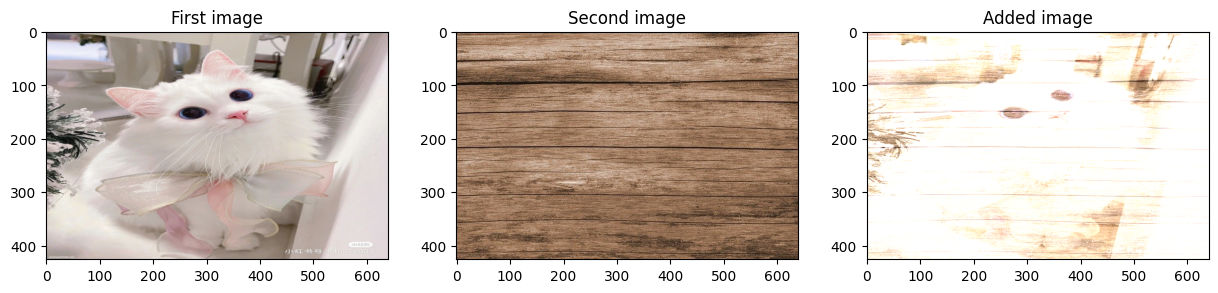

In [3]:
# Add image
added_img = cv2.add(resized_first_img, second_image)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(cv2.cvtColor(resized_first_img, cv2.COLOR_BGR2RGB))
plt.title("First image")

plt.subplot(132)
plt.imshow(cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB))
plt.title("Second image")

plt.subplot(133)
plt.imshow(cv2.cvtColor(added_img, cv2.COLOR_BGR2RGB))
plt.title("Added image")

Text(0.5, 1.0, 'Added image')

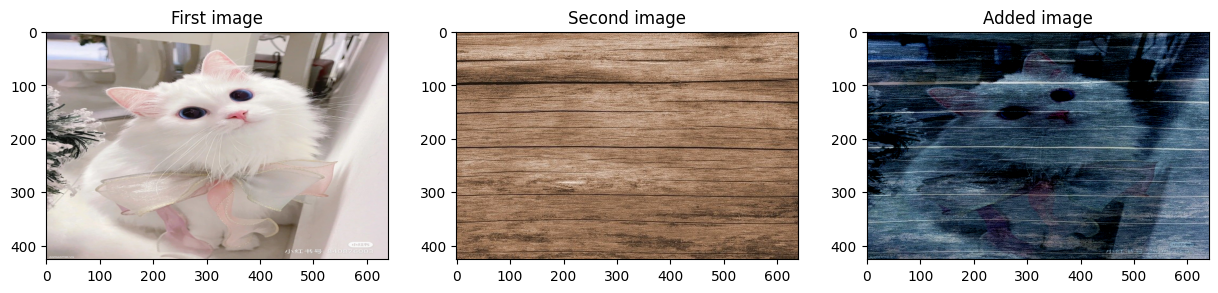

In [4]:
# Sub image
sub_img = cv2.subtract(resized_first_img, second_image)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(cv2.cvtColor(resized_first_img, cv2.COLOR_BGR2RGB))
plt.title("First image")

plt.subplot(132)
plt.imshow(cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB))
plt.title("Second image")

plt.subplot(133)
plt.imshow(cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB))
plt.title("Added image")

# Blending image


Text(0.5, 1.0, 'Added image')

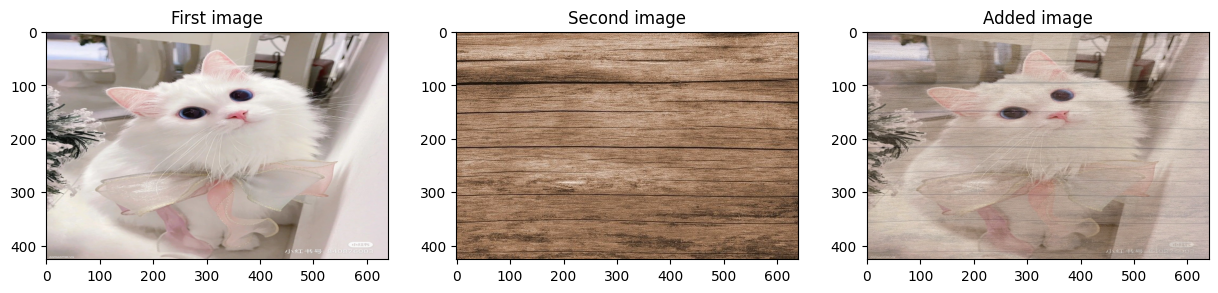

In [5]:
# image blending
# blend_image = 0.7 * resized_first_img + 0.3 * second_image + 0
blend_image = cv2.addWeighted(resized_first_img, 0.7, second_image, 0.3, 0)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(cv2.cvtColor(resized_first_img, cv2.COLOR_BGR2RGB))
plt.title("First image")

plt.subplot(132)
plt.imshow(cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB))
plt.title("Second image")

plt.subplot(133)
plt.imshow(cv2.cvtColor(blend_image, cv2.COLOR_BGR2RGB))
plt.title("Added image")

# Bitwise Operations
--> Bitwise AND: Giữ lại các vùng chung giữa hai ảnh. Ứng dụng trong trích xuất các vùng quan tâm.

--> Bitwise OR: Kết hợp các vùng của hai ảnh. Ứng dụng trong tạo mặt nạ tổng hợp.

--> Bitwise NOT: Đảo ngược giá trị pixel. Ứng dụng trong tạo ảnh phủ định và mặt nạ phủ định.

--> Bitwise XOR: Giữ lại các vùng khác biệt giữa hai ảnh. Ứng dụng trong phát hiện thay đổi và khác biệt.

Text(0.5, 1.0, 'Image 2')

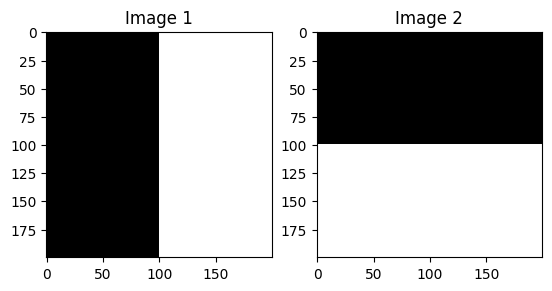

In [6]:
import numpy as np

image_1 = np.zeros((200, 200, 3), dtype=np.uint8)
image_1[:, 100:] = 255

image_2 = np.zeros((200, 200, 3), dtype=np.uint8)
image_2[100:, :] = 255

plt.subplot(121)
plt.imshow(image_1)
plt.title("Image 1")

plt.subplot(122)
plt.imshow(image_2)
plt.title("Image 2")

Bitwise NOT


Text(0.5, 1.0, 'NOT Original image')

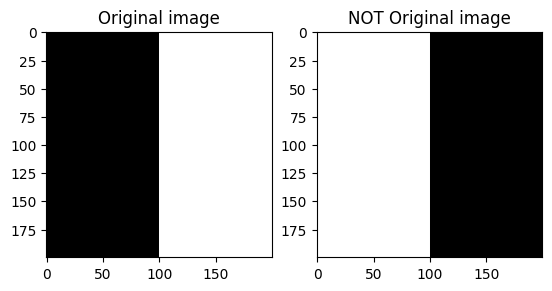

In [7]:
image_1_not = cv2.bitwise_not(image_1)

plt.subplot(121)
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.title("Original image")

plt.subplot(122)
plt.imshow(cv2.cvtColor(image_1_not, cv2.COLOR_BGR2RGB))
plt.title("NOT Original image")

Text(0.5, 1.0, 'Image AND')

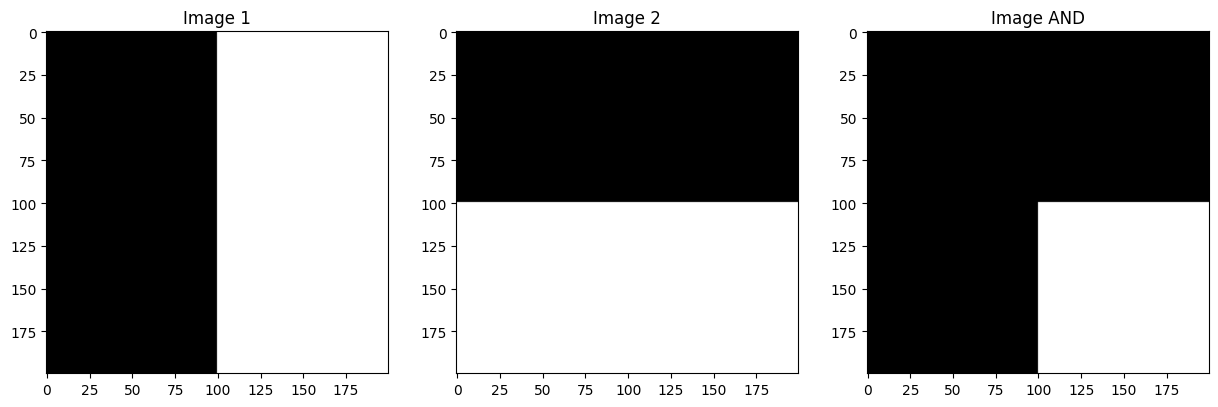

In [8]:
# image_and = cv2.bitwise_and(image1, image2, mask)
# --> nếu như không có mask thì với mỗi pixel ảnh trên image_and là kết quả của phép AND giữa hai điểm ảnh tương ứng trên image1 và image2
# --> nếu như có mask thì mask là một ảnh nhị phân và nó có ý nghĩa chỉ thực hiện phép AND giữa hai ảnh trên những vùng mà mask = 1.
# 
# mask trong bitwise_and có hữu ích trong xử lý ảnh như: 
#   ---> Tách vùng quan tâm (ROI): Chỉ áp dụng các phép toán trên các vùng cụ thể của hình ảnh.
#   ---> Kết hợp hình ảnh: Kết hợp các phần cụ thể của hai hình ảnh.
#   ---> Xử lý ảnh theo điều kiện: Áp dụng các biến đổi chỉ trên các phần của hình ảnh thỏa mãn điều kiện cụ thể.

# Đối với ảnh màu RGB thì bitwise_and thực hiện trên từng kênh màu. Xét ví dụ như sau: 
#  image1 có điểm ảnh RGB(123, 111, 12), image2 có điểm ảnh RGB(222, 145, 233) --> thực hiện bitwise
# --> image1:    (01111011, 01101111, 00001100)
# --> image2:    (11011110, 10010001, 11101001)
# --> image_and: (01011010, 00000001, 00001000)  --> RGB(90, 1, 8)

image_and_not_mask = cv2.bitwise_and(image_1, image_2)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(image_1)
plt.title("Image 1")

plt.subplot(132)
plt.imshow(image_2)
plt.title("Image 2")

plt.subplot(133)
plt.imshow(image_and_not_mask)
plt.title("Image AND")


Text(0.5, 1.0, 'Image AND with Mask')

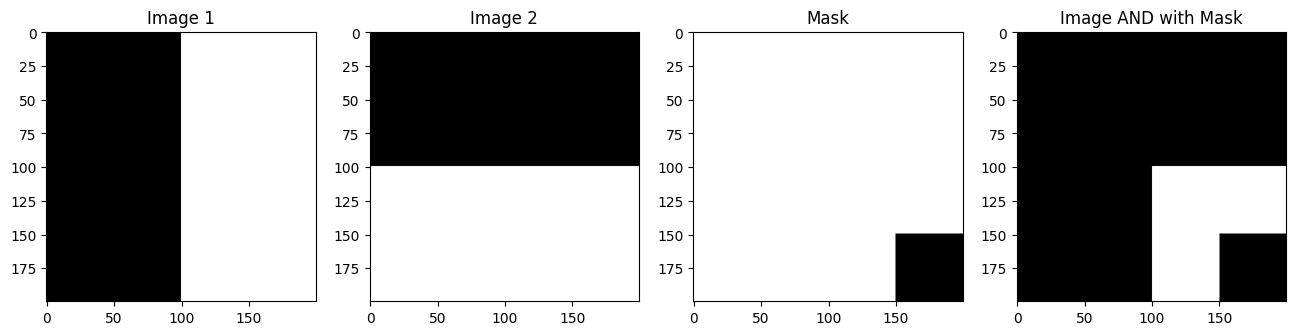

In [9]:
mask = np.ones((200, 200), dtype=np.uint8) * 255
mask[150:200, 150:200] = 0

image_and_mask = cv2.bitwise_and(image_1, image_2, mask = mask)

plt.figure(figsize=[16,4])

plt.subplot(141)
plt.imshow(image_1)
plt.title("Image 1")

plt.subplot(142)
plt.imshow(image_2)
plt.title("Image 2")

plt.subplot(143)
plt.imshow(mask, cmap='gray')
plt.title("Mask")

plt.subplot(144)
plt.imshow(image_and_mask)
plt.title("Image AND with Mask")

Text(0.5, 1.0, 'Image OR')

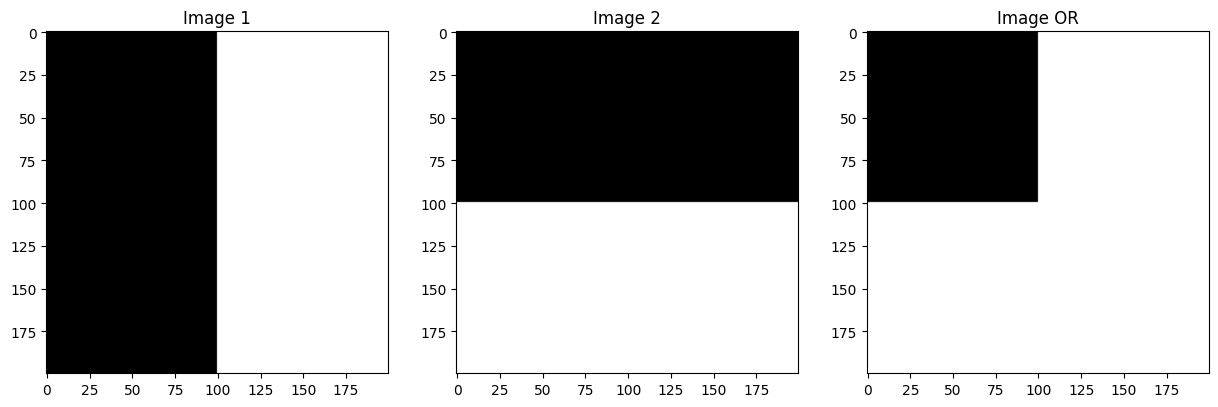

In [10]:
image_or_not_mask = cv2.bitwise_or(image_1, image_2)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(image_1)
plt.title("Image 1")

plt.subplot(132)
plt.imshow(image_2)
plt.title("Image 2")

plt.subplot(133)
plt.imshow(image_or_not_mask)
plt.title("Image OR")

Text(0.5, 1.0, 'Image XOR')

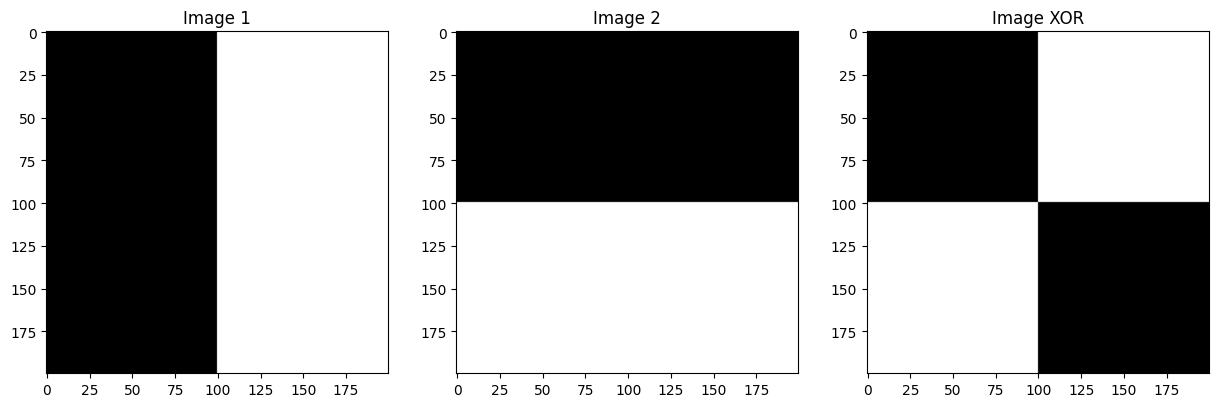

In [11]:
image_xor_not_mask = cv2.bitwise_xor(image_1, image_2)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(image_1)
plt.title("Image 1")

plt.subplot(132)
plt.imshow(image_2)
plt.title("Image 2")

plt.subplot(133)
plt.imshow(image_xor_not_mask)
plt.title("Image XOR")